
# Project: Investigate a Dataset (Medical Appointment No Show)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
### About the Dataset
Link to Dataset: https://www.kaggle.com/datasets/joniarroba/noshowappointments

> **Overview**: The dataset 'Medical Appointment No Shows'; originally gotten from https://www.kaggle.com/datasets/joniarroba/noshowappointments investigates the rate of pateints' attendance for their medical appointment in Brazilian hospitals. Data from over 100,000 medical appointments in Brazil are included in this dataset, with a particular emphasis on the subject of patient attendance. The dataset comprises columns (variables such as:


>1. PatientId: Identification of a patient
>2. AppointmentID: Identification of each appointment
>3. Gender: (Male or Female)
>4. Scheduled Day: The day of the actuall appointment, when they have to visit the doctor.
>5. Appointment Day: The day someone called or registered the appointment, this is before appointment of course.
>6. Age: How old is the patient.
>7. Neighbourhood: Where the appointment takes place.
>8.Scholarship: (Yes or No)
>9. Hipertension: (Yes or No)
>10. Diabetes: (Yes or No)
>11. Alcoholism: (Yes or No)
>12. Handcap: (Yes or No)
>13. SMS_received: (1 or more messages sent to the patient)
>14. No-show: (True or False). - **Note**: No, means the patient showed up for the appointment and yes, means the patient didn"t show up.

## Research Questions:
> 1. The number (Percentage) of Persons who showed up for their appointment**
> 2. Does gender affect no show rate.
> 3. What is the distribution of the patients' age.
> 4. Effect of SMS on No Show rate.

## Importation of packages needed for this project

In [409]:
#Packages need for this project are imported below.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



<a id='wrangling'></a>
# Data Wrangling

>  In this section of the report, the dataset will be loaded. To ensure the data is clean for analysis irregularities such as missing values, outliers, duplicate rows in the dataset will be checked.



### **Loading Data**

In [410]:
# Loading the database
df=pd.read_csv("dataset.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> ### **General Properties**:
In this subsection, I will be checking the general properties such as the shape of the data; i.e the number of rows and columns, the data types of each column, duplicates rows. Also, a summary statistics and plot of the data will be presented which will further help me give a general overview of the entire dataset. 

In [411]:
#Checking for the number of rows 
df.shape

(110527, 14)

> ### **The number of rows and columns**:
It is seen from the previous code cell that, the data has **110527 rows and 14 columns**

> ### **Checking for data types of each column**
The next code cell checks for the data types of the dataset parameters

In [412]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [413]:
# Checking for duplicate rows
count=df.duplicated().sum()
print('There are', count, 'duplicate')

There are 0 duplicate


> ### **Checking for duplicate rows**
The code cell above checks if there are duplicates row in the data.
It is seen that, there are no duplicates row.

> ### **Checking for missing values**
There are no missing values in the dataset as seen from the code cell below

In [414]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> ### **Summary of the data**
A summary of the data statistics is carried out in the next code cell. 
I observed that the **Age** variable has a negative value, this is abnormal. Summary statistics for the Age variable will be carried out too.
Further queries will be carried out on the Age column to check for further abnormalities. 


In [415]:
# Getting Summary statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


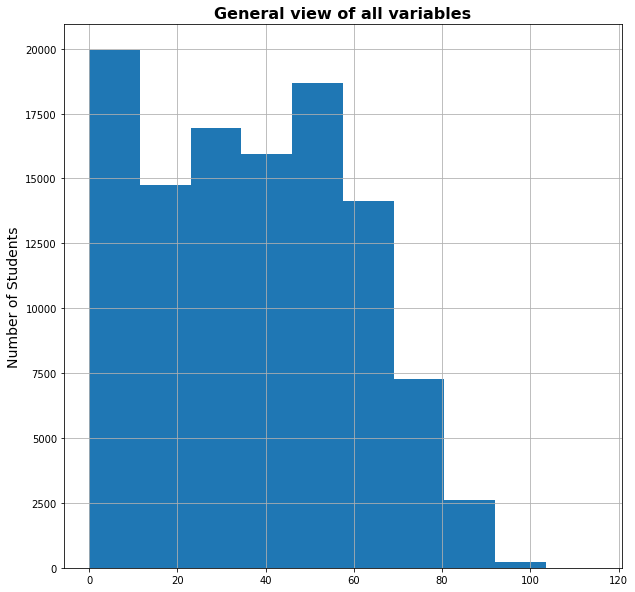

In [487]:
df.hist(figsize=(10,10));
plots_titles("General view of all variables", "", "Number of Students")

> ### **Summary Statistics of Age Variable**
A summary of Age variable is carried out in the next code cell. 
It is therefore confirmed that, the age variable has negative variable which will be resolved in the cleaning section.


In [417]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

# Data Cleaning 
>  In this section, uncessary features will be removed).

>## Dropping Columns(Variables not needed)
I will be dropping columns that are not necessary for analysis


In [418]:
# Dropping unnecessary columns
df.drop(columns=['PatientId','AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Handcap', 
                 'Scholarship', 'Alcoholism', 'Hipertension','Diabetes'], inplace=True)

In [419]:
#To confirm
df.head()

,Gender,Age,Neighbourhood,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


> ### Renaming Variables (Column)
This sub-section will rename some columns

In [420]:
#renaming the coolumn names
df.rename(columns={'No-show':'no_show'}, inplace=True)

In [421]:
#Confirming if the column has been renamed.
df.head()

,Gender,Age,Neighbourhood,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


>### Removing rows with negative values.
> It is seen that the age variable has negative values from the previous section, the code cell below will remove the rows with negative values. 


In [422]:
# Removing the rows with negative values.
df.drop(df[df['Age']<0].index, inplace=True)

In [423]:
# To confirm 
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

## Replacing Variable Parameters
In this subsection, I will rplace some parameters to make it more presentable, 

For example, the **Gender** variable is categorized M and F, I will rename it Male and Female respectively.

Also, the SMS variables with **0 ***will be replaced with **Not Receievd** and those with **1 ***will be replaced with **Received**. 

In [424]:
#Replacing M with Male and F with Female.
df['Gender'].replace(['F','M'], ['Female','Male'], inplace=True)


#Replacing 0 with No and 1 with Yes for Scholarsip variable, Alcoholism,and SMS_received

df['SMS_received'].replace([0, 1], ['Not received', 'Received'], inplace=True)


In [425]:
#To confirm if the variable parameters are replaced
df.head()

,Gender,Age,Neighbourhood,SMS_received,no_show
0,Female,62,JARDIM DA PENHA,Not received,No
1,Male,56,JARDIM DA PENHA,Not received,No
2,Female,62,MATA DA PRAIA,Not received,No
3,Female,8,PONTAL DE CAMBURI,Not received,No
4,Female,56,JARDIM DA PENHA,Not received,No


<a id='eda'></a>
## Exploratory Data Analysis



In [466]:
#Function to plot bar graphs
def bar_plots(dfdata, title, type):
        g=dfdata.plot( kind=type , figsize=(15, 8), color= ['teal', 'crimson'])
        #g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
        plt.title(title)
    
#Function to plot Pie charts
def pie_plots(dfdata, title, type):
        plt=dfdata.plot(kind=type , figsize=(10, 5), autopct='%1.0f%%')
        #g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
        plt.title(title)
        
#Function to set the titles, xlabels and ylabels of plots.
def plots_titles(title, xlabel, ylabel):
        plt.title(title, fontsize = 16, fontweight = 'bold');
        plt.xlabel(xlabel, fontsize = 14)
        plt.ylabel(ylabel, fontsize = 14)
        plt.show()

>### Research Question 1: Number of persons who showed for their appointment 

In [427]:
#Persons who showed up for their medical appointment
show=df['no_show'].value_counts().No

#Number of persons who did not show up for their medical appointment
no_show=df['no_show'].value_counts().Yes
print('The number of persons who did not show up for their appointment is', no_show,
      '\n Whereas the number of persons who showed up  is', show)



The number of persons who did not show up for their appointment is 22319 
 Whereas the number of persons who showed up  is 88207


In [428]:
#Finding their percentages: 
#Verifying the total numbers of patients.
df.shape
total_patients=110526



In [429]:

#Show Percentage
show_percentage=(show/110526)*100
show_percentage_rounded='%.2f' % show_percentage

#No Show Percentage
noshow_percentage=(no_show/110526)*100
noshow_percentage_rounded='%.2f' % noshow_percentage

plot_data=pd.DataFrame({'': [show, no_show]},
                  index=['Number of persons that showed', 'Number of persons that did not show up'])
labels=['Patients that Show('+show_percentage_rounded+')', 'Patients that did not Show('+noshow_percentage_rounded+')']


>### Conclusion:
>From the Pie Chart aove, it is seen that, the percentage of those who turn up for their medical appointment is higher than
those that did not turn up

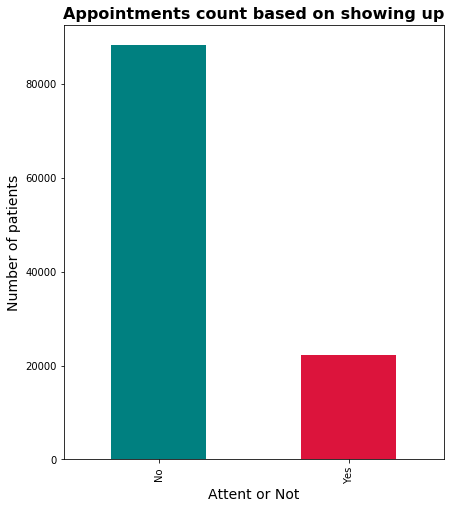

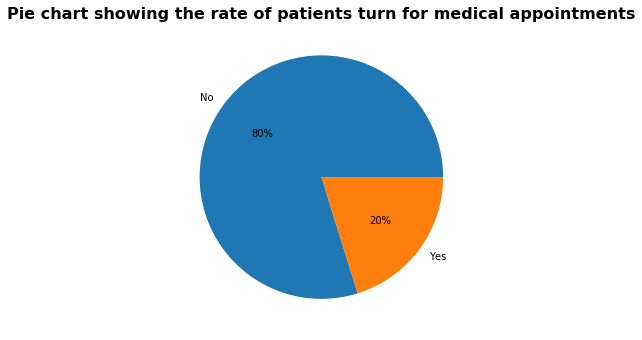

In [469]:
# Usin bar plot function to plot the 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
bar_plots(df.no_show.value_counts(), "Appointments count based on showing up", 'bar')
plots_titles('Appointments count based on showing up', 'Attent or Not', 'Number of patients')

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
df.no_show.value_counts().plot(kind='pie',autopct='%1.0f%%')
plots_titles('Pie chart showing the rate of patients turn for medical appointments', '', '')

>### Research Question 2: Does Gender affects no show rate?

In [431]:
#Countin the number of females and males
no_males=df['Gender'].value_counts().Male
print(no_males)

no_females=df['Gender'].value_counts().Female
print(no_females)

38687
71839


> From the code cell above, it is seen that there are 71839 Females in the dataset, and 38687 males.
A plot of their distribution and their percenatge ratio is shown in the proceeding code cells

### __Bar Chart plot showin the gender distribution__

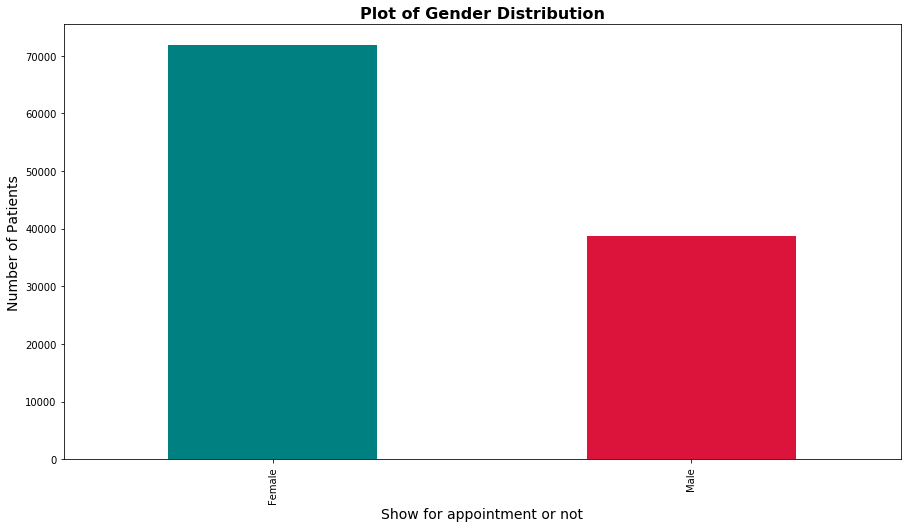

In [472]:
#Plotting Gender Distribution
# barplots function usable in subplots for bar pgrahps
bar_plots(df.Gender.value_counts(), "Plot of Gender Distribution", 'bar')
plots_titles('Plot of Gender Distribution', 'Show for appointment or not', 'Number of Patients');


> ### **Pie Chart plot showin the gender distribution**

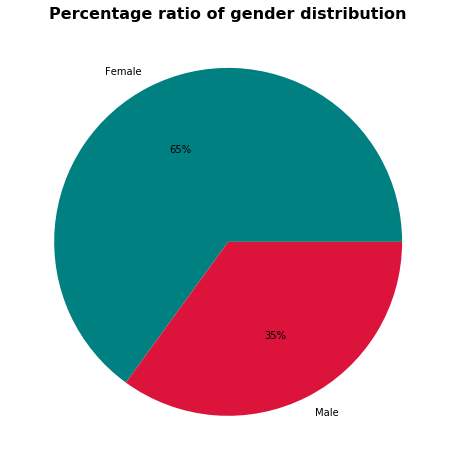

In [473]:
 #Pie chart plot
gender_share = df.Gender.value_counts().plot(kind='pie',autopct='%1.0f%%', figsize=(10, 8), colors= ['teal', 'crimson'],)
plt.title('Percentage ratio of gender distribution', fontsize = 14, fontweight = 'bold');
plots_titles('Percentage ratio of gender distribution', '', '')




> ### Gender Distribution
> From the plot and the pie chart, it is seen that there are more females than males, implying that females are rather more inclined to seek for medical help or the ratio of females to males is rather high in Brazil. Next I will evaluate if there are more likely to turn up for their medical appointments


>> ### Calculating the No Show percentage for both gender:
>>I will be calculating the percentage of persons who showed up for both gender and visualizing it using a bar chart to obtain the distribution

In [434]:
#Calculating the no show for females.
gender_total=df['Gender'].shape
print(gender_total)

no_shows=df.groupby(['Gender', 'no_show']).count()['Age']
print(no_shows)



(110526,)
Gender  no_show
Female  No         57245
        Yes        14594
Male    No         30962
        Yes         7725
Name: Age, dtype: int64


In [435]:
#total males and females
total_female=57245+14594
total_male=30962+7725
print(total_female)
print(total_male)

71839
38687


In [436]:
#Calculatuing the percentage of those that showed up for their appointments for females

female_show=(57245/total_female)*100

#Calculatuing the percentage of those that did not showed up for their appointments for females
female_noshow=(14594/total_female)*100

print("The percentage of female that showed up is", female_show, 
      '\n while the percentage of females that did not show up is', female_noshow)

The percentage of female that showed up is 79.68512924734476 
 while the percentage of females that did not show up is 20.314870752655242


In [437]:
male_show=(30962/total_male)*100
male_noshow=(7725/total_male)*100
print("The percentage of male that showed is", male_show, 
      '\n while the percentage of male that did not showed up is', male_noshow)

The percentage of male that showed is 80.03205211052808 
 while the percentage of male that did not showed up is 19.967947889471915


>> ### Percentage of those who showed up for their medical appointmnents for both gender

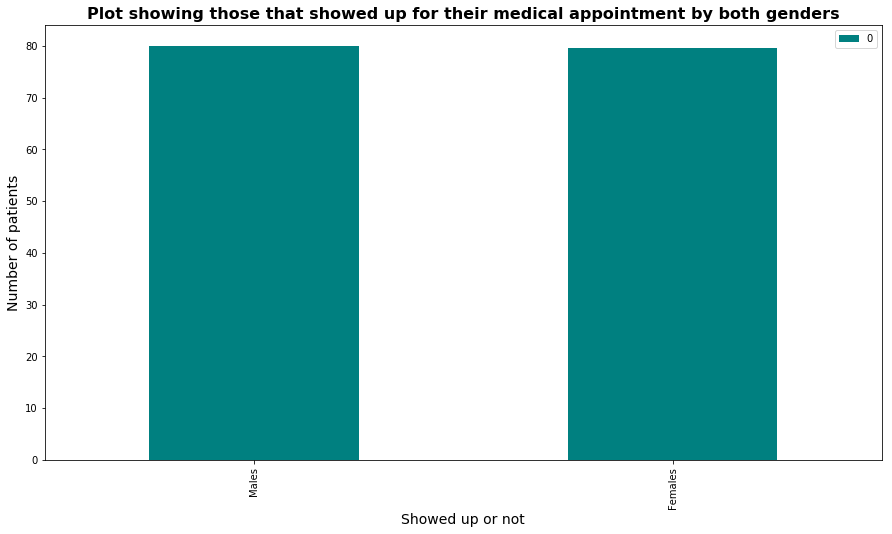

In [477]:
show_data=pd.DataFrame([male_show, female_show], 
                       index=['Males', 'Females'])
#plot1 = show_data.plot( kind='bar' , figsize=(10, 5));#bar plot function is called to visualize the dataser
bar_plots(show_data, "Plot showing those that showed up for their medical appointment by both genders", 'bar')
plots_titles('Plot showing those that showed up for their medical appointment by both genders', 'Showed up or not', 'Number of patients');



>> ### Percentage of those who did not showed up for their medical appointmnents for both gender

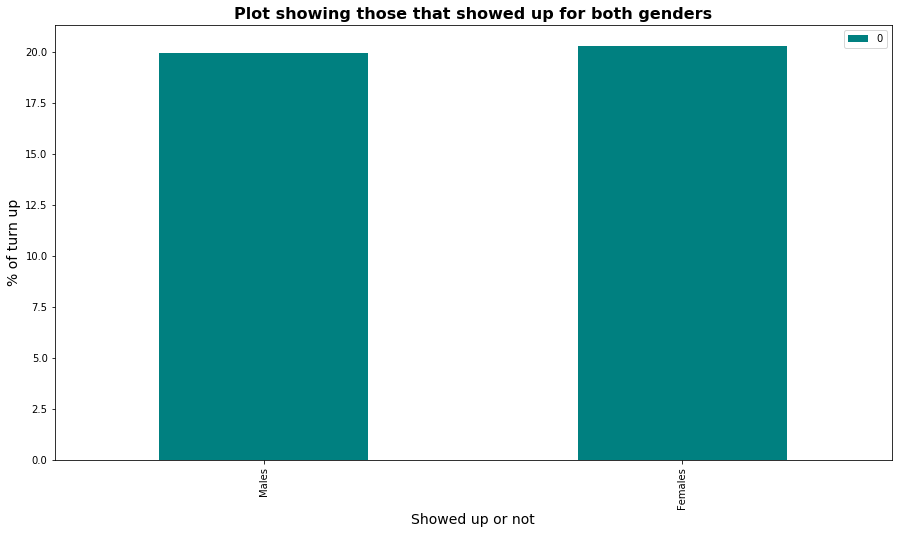

In [480]:
no_show_data=pd.DataFrame([male_noshow, female_noshow], index=['Males', 'Females'])
#plot2=no_show_data.plot( kind='bar' , figsize=(10, 5));
bar_plots(no_show_data, "Plot showing those that showed up for both genders", 'bar')
plots_titles('Plot showing those that showed up for both genders', "Showed up or not", "% of turn up");

>### Summarily:
Even though the female tends to have more scheduled appointments than the male, it is observed that from the above plots that, this does not affect the no show rate. 

### Research Question 3: What is the distribution of the patients' age

In [440]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

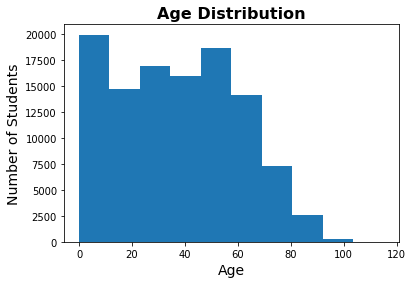

In [481]:
df['Age'].plot(kind='hist', title='Stability');
plots_titles("Age Distribution", 'Age', 'Number of Students')

>From the data, the minimum age is 0.

>The maximum age is 115.

>The average age is 37 years.

> ## Question 4: Effect of SMS on No Show rate

In [442]:
#To create a contigency table
neighbourhood = pd.crosstab(df['SMS_received'], df['no_show'], margins = False)
neighbourhood_df=pd.DataFrame(neighbourhood)
neighbourhood_df.tail(50)

no_show,No,Yes
SMS_received,,
Not received,62509,12535
Received,25698,9784


In [443]:
#totalnumber of patients who received sms
received_total=25698+9784

#total number of patients who did not received sms
not_received_total=62509+12535

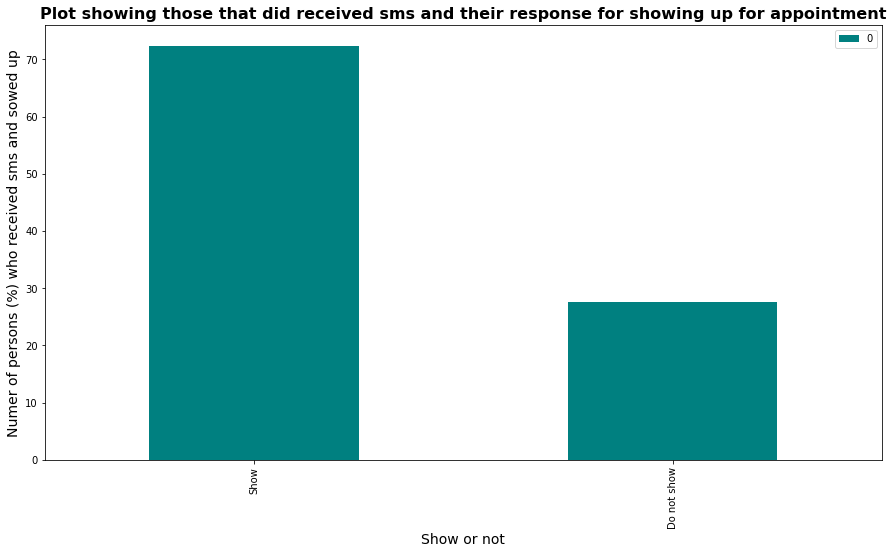

In [483]:
#percentage of those who received sms and show up for their appointment.
received_show=(25698/received_total)*100


#percentage of those who received sms and do not show up for their appointment.
received_noshow=(9784/received_total)*100

#Plotting their percentages
sms_df1=pd.DataFrame([received_show,received_noshow ], index=['Show', 'Do not show'])
bar_plots(sms_df1, "", 'bar')
plots_titles("Plot showing those that did received sms and their response for showing up for appointment",
                      "Show or not", "Numer of persons (%) who received sms and sowed up")

> Out of the total number of persons who received SMS, 72% showed up and about 28% did not show up for their appointment

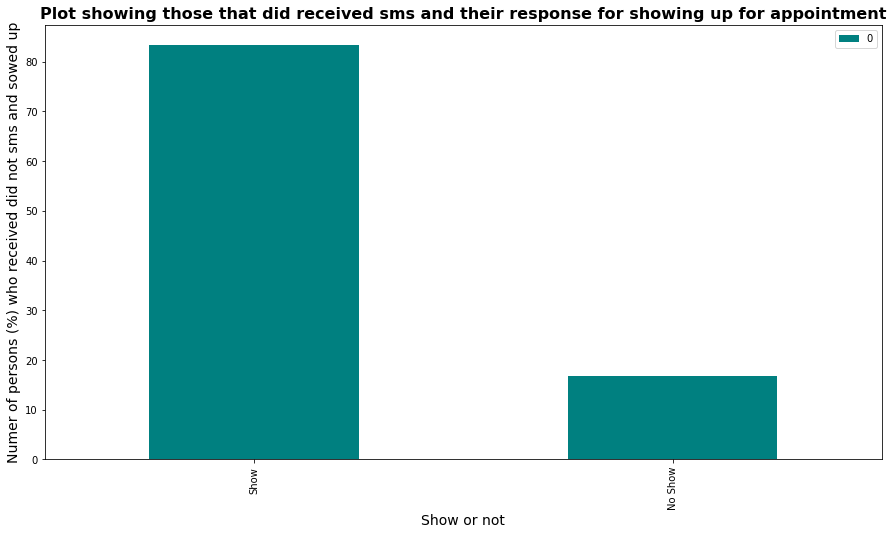

In [485]:

#percentage of those who did not received and showed up
not_received_show=(62509/not_received_total)*100

#Percentage of those who did not received sms and did not showed up
not_received_noshow=(12535/not_received_total)*100
sms_df2=pd.DataFrame([not_received_show, not_received_noshow], index=['Show', 'No Show'])

plot2=bar_plots(sms_df2, "Plot showing those that did received sms and their response for showing up for appointment", 'bar')

plots_titles("Plot showing those that did received sms and their response for showing up for appointment",
                      "Show or not", "Numer of persons (%) who received did not sms and sowed up")




> Out of the total number of persons who did not received SMS 83% showed up and about 17% did not showed up for their appointment

>> **Then**: I observed that, SMS does not influence the no show rate.

<a id='conclusions'></a>
## Conclusions

>From the analysis of the data it can be concluded that:
> 1. The percentage of those who turned up for their medical apointment is higher than those who did not turned up.
> 2. There are more females than males in the medical appointments scheduled.
> 3. The gender factor does not affect the no show rate.
> 4. The minimum age of the dataset is 0 year, the maximum age is 115 years and the average age is 37 years.
> 5. SMS does not affect No show rate.


<a id='conclusions'></a>
## Limitations

>One of the limitation I find in the dataset is that, there is a negative value in the dataset. This was corrected before analysis was carried out. Moreso, while I would have loved to explore the effect patients' neighbourhood has on their showing up for appointment, I could not find a any relationship between the two.



## References


> 1. https://www.kaggle.com/datasets/joniarroba/noshowappointments
> 2. https://www.kaggle.com/code/joshuaadetayo/medical-no-show-analysis
> 3. https://www.kaggle.com/code/asyehia/no-show-appointments